In [1]:
# Importing the Qiskit standard library and setting up an account
import math
import numpy as np
from math import sqrt
from numpy import pi 
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit.library import XGate
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_aer import Aer
from time import process_time

In [2]:
# qiskit 2.2.1
backend = Aer.get_backend('unitary_simulator')

In [3]:
# Construction of the Uf matrix
nn=3
oracle=np.identity(2**nn)
oracle[2,2]=-1
print(oracle)
Uf=Operator(oracle)
Operator.is_unitary(Uf) 


[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]


True

In [4]:
# Creating quantum registers, 
# classical registers and a quantum circuit 
# representing the created Uf operator 
# Number of qubits and bits
n0=nn
# Quantum Register
q0 = QuantumRegister(n0)
# "Empty" quantum circuit
# for a gate named 'Uf'
CircuitUf = QuantumCircuit(q0,name='Uf')

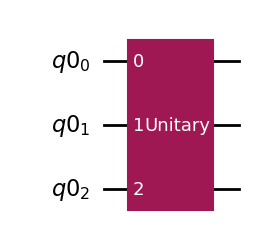

In [5]:
# Attaching the Uf operator to the circuit
# representing the Uf gate
CircuitUf.append(Uf,[q0[0],q0[1],q0[2]])
# Sketch of a quantum circuit
CircuitUf.draw(output='mpl')

In [6]:
# Transforming the Uf operator 
# into a uf quantum gate 
# denoted as Uf
uf=CircuitUf.to_gate()

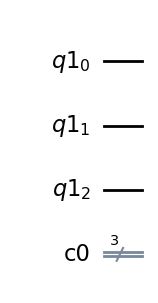

In [7]:
# Creating an "empty" warp
# quantum circuit of Grover's algorithm
# Number of qubits and bits
n=nn 
# Quantum Register
q = QuantumRegister(n) 
#  Classical Register
c = ClassicalRegister(n) 
# "Empty" quantum circuit -
# - the core of Grover's algorithm
Circuit = QuantumCircuit(q,c) 
# Sketch of a quantum circuit
Circuit.draw(output='mpl') 

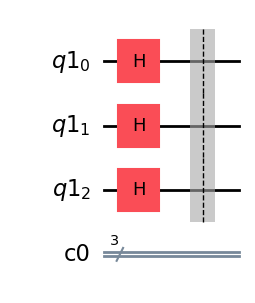

In [8]:
# |fi> State initiation 
Circuit.h(q[0])
Circuit.h(q[1])
Circuit.h(q[2])
Circuit.barrier()
# Sketch of a quantum circuit
Circuit.draw(output='mpl')

In [9]:
repeat=math.floor((pi/4)*sqrt(2**n))
print(repeat)

2


In [10]:
mccx=XGate().control(n0-1)

N= 1


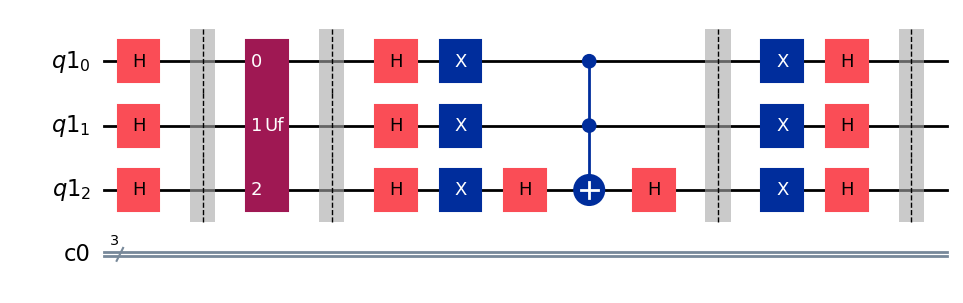

N= 2


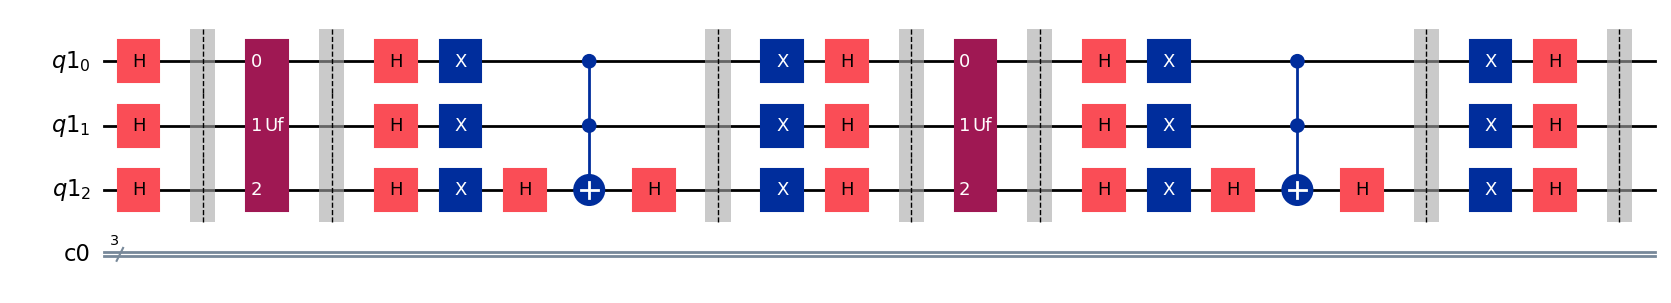

In [11]:
for ii in range(repeat):
    Circuit.append(uf,[0,1,2])
    Circuit.barrier() 
    # Beginning of the implementation of the W diffusion operator
    Circuit.h(q[0])
    Circuit.h(q[1])
    Circuit.h(q[2])
    Circuit.x(q[0])
    Circuit.x(q[1])
    Circuit.x(q[2])
    Circuit.h(q[2])
    Circuit.append(mccx, [q[0],q[1],q[2]])
    Circuit.h(q[2])
    Circuit.barrier()
    Circuit.x(q[0])
    Circuit.x(q[1])
    Circuit.x(q[2])
    Circuit.h(q[0])
    Circuit.h(q[1])
    Circuit.h(q[2]) 
    # The end of the implementation of the W diffusion operator
    Circuit.barrier()
    print("N=",ii+1)
    # print(Circuit)
    display(Circuit.draw(output='mpl'))

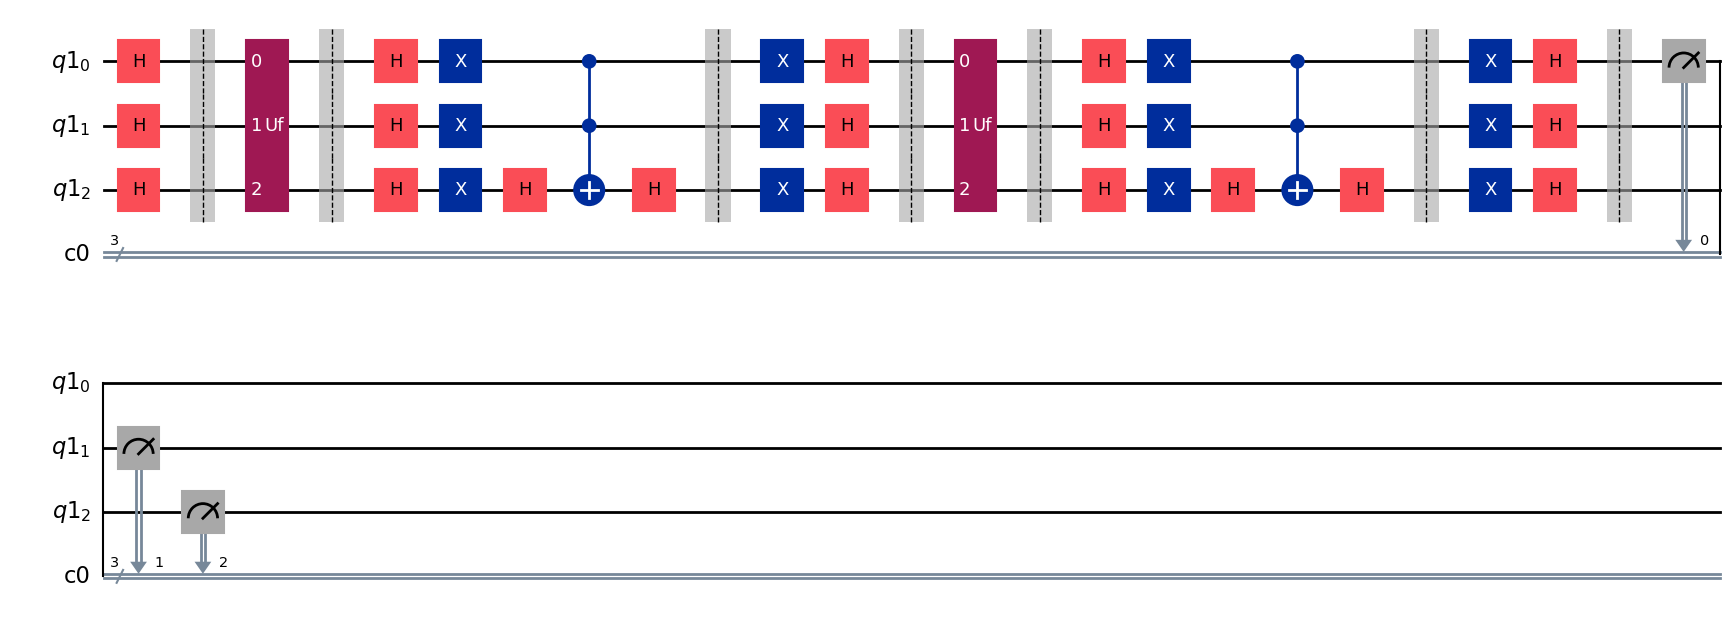

In [12]:
# Adding measurement operations to the quantum circuit
Circuit.measure(q[0],c[0])
Circuit.measure(q[1],c[1])
Circuit.measure(q[2],c[2])
Circuit.draw(output='mpl') # 

In [13]:
# Start the stopwatch / counter  
t1_start = process_time() 

In [14]:
# Select a quantum simulator (or processor).
backend_sim = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the specific backend (needed in qiskit 1.x)
transpiled_circuit = transpile(Circuit, backend_sim)

# Perform quantum calculations
job_sim0 = backend_sim.run(transpiled_circuit, shots=1024)
sim_result0 = job_sim0.result()

# Numerical presentation of measurement results
print(sim_result0.get_counts())

{'010': 975, '101': 7, '111': 14, '011': 2, '100': 5, '000': 10, '001': 4, '110': 7}


In [15]:
# Stop the stopwatch / counter 
t1_stop = process_time() 
print("Elapsed time:", t1_stop, t1_start)  
print("Elapsed time during the whole program in seconds:", t1_stop-t1_start)  

Elapsed time: 3.984375 3.125
Elapsed time during the whole program in seconds: 0.859375


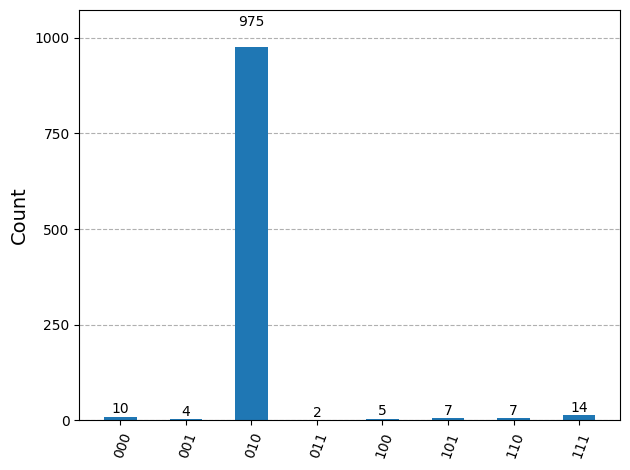

In [16]:
# Graphical presentation of X measurement results
plot_histogram(sim_result0.get_counts(Circuit))

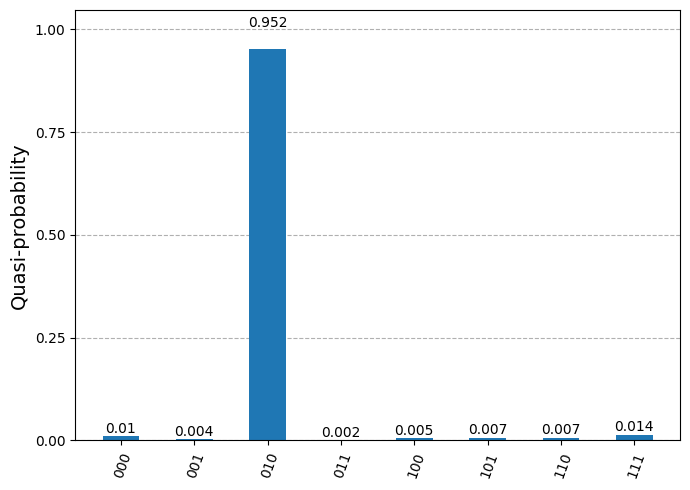

In [17]:
# Graphical presentation of X measurement results
plot_distribution(sim_result0.get_counts(Circuit))

# Project 4 - 151936

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator

N_TO_TEST = [2, 3, 4, 5, 6]
QUBITS_TO_TEST = [2, 3, 4, 5, 6]
BACKEND = AerSimulator()
ID = 151936
SHOTS = 1024

In [31]:
class TargetFunction():
    def __init__(self, target):
        self.target = target
    
    def compare(self, x):
        raise NotImplementedError("Subclasses should implement this method.")
    
class BinaryTargetFunction(TargetFunction):
    def __init__(self, target):
        super().__init__(int(target, 2))

class SameBinaryTargetFunction(BinaryTargetFunction):
    def __init__(self, target):
        super().__init__(target)
    
    def compare(self, x):
        return x == self.target
    
class SameTargetFunction(TargetFunction):
    def __init__(self, target):
        super().__init__(target)
    
    def compare(self, x):
        return x == self.target

In [63]:
def calculate_optimal_iterations(n):
    return int(np.floor(np.pi/4 * np.sqrt(2**n)))

def createUf(f, n):
    qc = QuantumCircuit(n, name="Uf")
    for x in range(2**n):
        if f.compare(x):
            x_bin = format(x, f'0{n}b')[::-1]
            for i, bit in enumerate(x_bin):
                if bit == '0':
                    qc.x(i)

            qc.h(n-1)
            qc.mcx(list(range(n-1)), n-1)
            qc.h(n-1)

            for i, bit in enumerate(x_bin):
                if bit == '0':
                    qc.x(i)

    return qc

def createGroverDiffusion(n):
    qc = QuantumCircuit(n, name="W")

    qc.h(range(n))
    qc.x(range(n))

    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    qc.x(range(n))
    qc.h(range(n))

    return qc

def groverAlgorithm(f, n, iterations=None):
    qc = QuantumCircuit(n, n)

    qc.h(range(n))

    if iterations is None:
        iterations = int(np.floor(np.pi/4 * np.sqrt(2**n)))

    for _ in range(iterations):
        qc.compose(createUf(f, n), inplace=True)
        qc.compose(createGroverDiffusion(n), inplace=True)

    qc.measure(range(n), range(n))

    return qc

def performTest(n, target, max_iterations=None):
    a = target % (2**n)
    print(f"Number of qubits: {n}, Target state: {a}, Original target: {target}")
    
    oracle = SameTargetFunction(a)
    
    optimal_r = calculate_optimal_iterations(n)
    if max_iterations is None:
        max_iterations = optimal_r
    print(f"Max iterations for testing: {max_iterations}")
    
    probabilities = []
    
    for s in range(1, max_iterations + 1):
        circGrover = QuantumCircuit(n, n)
        circGrover.h(range(n))
        for _ in range(s):
            circGrover.compose(createUf(oracle, n), inplace=True)
            circGrover.compose(createGroverDiffusion(n), inplace=True)
        circGrover.measure(range(n), range(n))
        
        result = BACKEND.run(circGrover, shots=SHOTS).result()
        counts = result.get_counts()
        p_a = counts.get(format(a, f'0{n}b'), 0) / SHOTS
        probabilities.append(p_a)

        if s == optimal_r:
            optimal_counts = counts
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    
    x = np.arange(1, max_iterations + 1)
    ax1.plot(x, probabilities, marker='o', linestyle='-', color='blue', label='p_a(s)')
    
    for i, p in enumerate(probabilities):
        ax1.text(x[i], p + 0.02, f"{p:.2f}", ha='center', fontsize=9)
    
    ax1.axvline(optimal_r, color='red', linestyle='--', label=f'Optimal r = {optimal_r}')
    
    mult = 2
    while optimal_r * mult <= max_iterations:
        ax1.axvline(optimal_r * mult, color='orange', linestyle=':', alpha=0.7)
        mult += 1
    
    ax1.set_xticks(x)
    ax1.set_xlabel("Iteration step s")
    ax1.set_ylabel("Probability p_a(s)")
    ax1.set_title(f"Probability of measuring |{a}>")
    ax1.grid(True)
    ax1.legend()
    
    all_states = [format(i, f'0{n}b') for i in range(2**n)]
    counts_values = [optimal_counts.get(state, 0) for state in all_states]
    probs_values = [count / SHOTS for count in counts_values]
    colors = ['red' if state == format(a, f'0{n}b') else 'green' for state in all_states]
    
    bars = ax2.bar(all_states, counts_values, color=colors, alpha=0.7)
    
    for bar, prob in zip(bars, probs_values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + 5, f"{prob:.2f}", ha='center', fontsize=9)
    
    ax2.set_xlabel("States")
    ax2.set_ylabel("Counts (shots)")
    ax2.set_title(f"Histogram at optimal r={optimal_r}")
    ax2.set_xticklabels(all_states, rotation=45, ha='right')
    ax2.grid(True, axis='y')
    
    plt.suptitle(f"Grover's Algorithm Simulation (n={n}, target={a})", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    return probabilities, optimal_counts


In [39]:
for n in N_TO_TEST:
    optimal_iterations = calculate_optimal_iterations(n)
    print(f"n={n}: Optimal number of iterations = {optimal_iterations}")

n=2: Optimal number of iterations = 1
n=3: Optimal number of iterations = 2
n=4: Optimal number of iterations = 3
n=5: Optimal number of iterations = 4
n=6: Optimal number of iterations = 6


Number of qubits: 2, Target state: 0, Original target: 151936
Max iterations for testing: 10


C:\Users\tymon\AppData\Local\Temp\ipykernel_10492\65366846.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(all_states, rotation=45, ha='right')


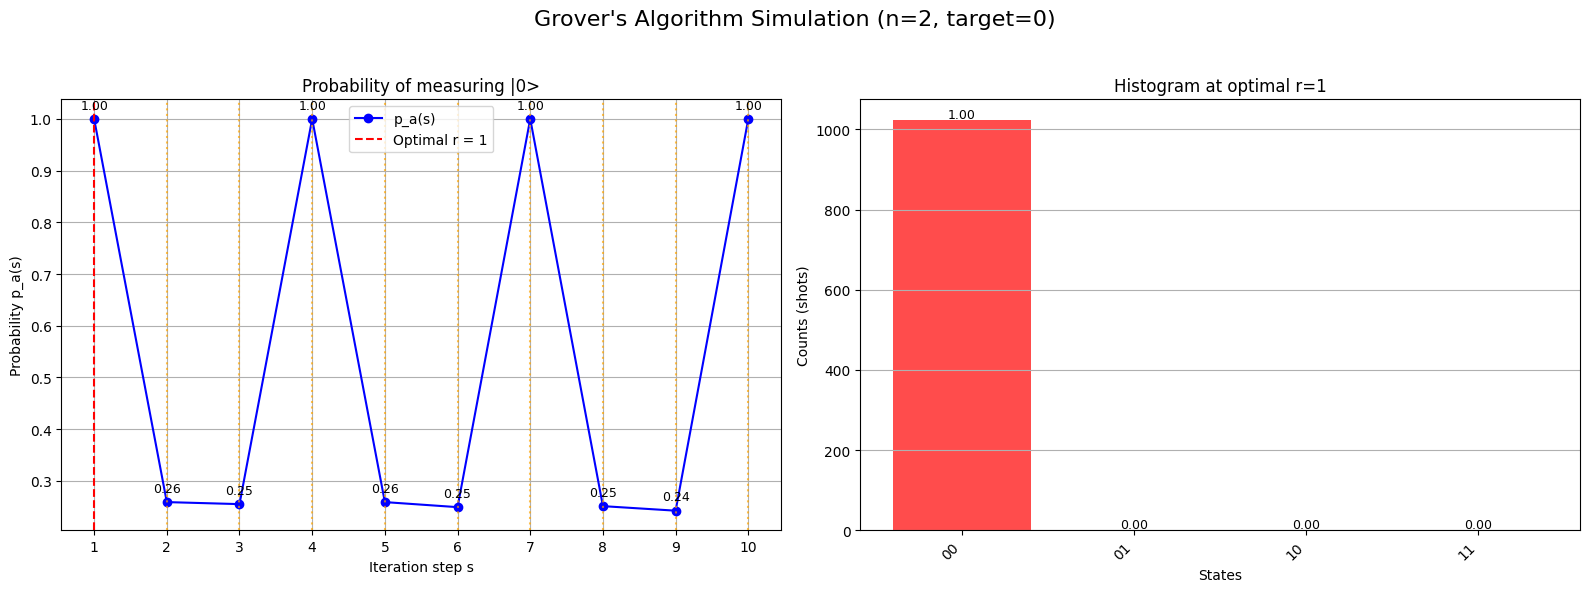

Number of qubits: 3, Target state: 0, Original target: 151936
Max iterations for testing: 10


C:\Users\tymon\AppData\Local\Temp\ipykernel_10492\65366846.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(all_states, rotation=45, ha='right')


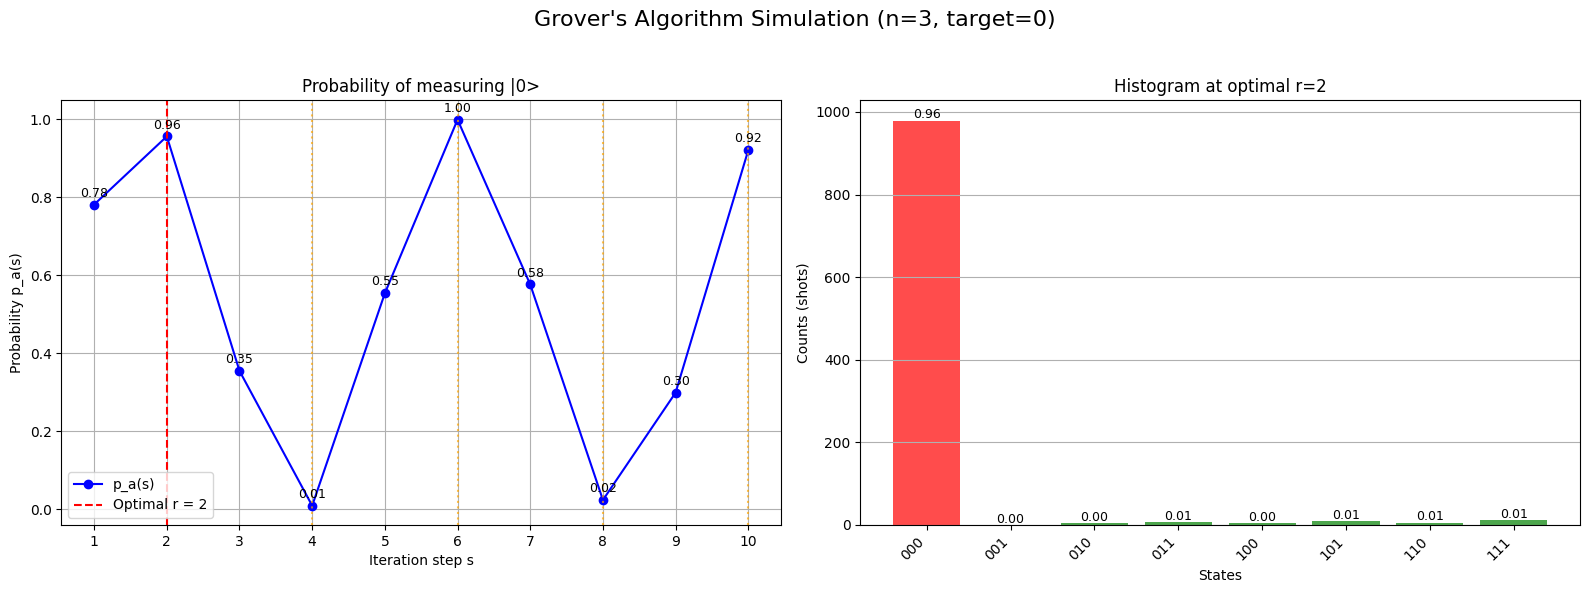

Number of qubits: 4, Target state: 0, Original target: 151936
Max iterations for testing: 10


C:\Users\tymon\AppData\Local\Temp\ipykernel_10492\65366846.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(all_states, rotation=45, ha='right')


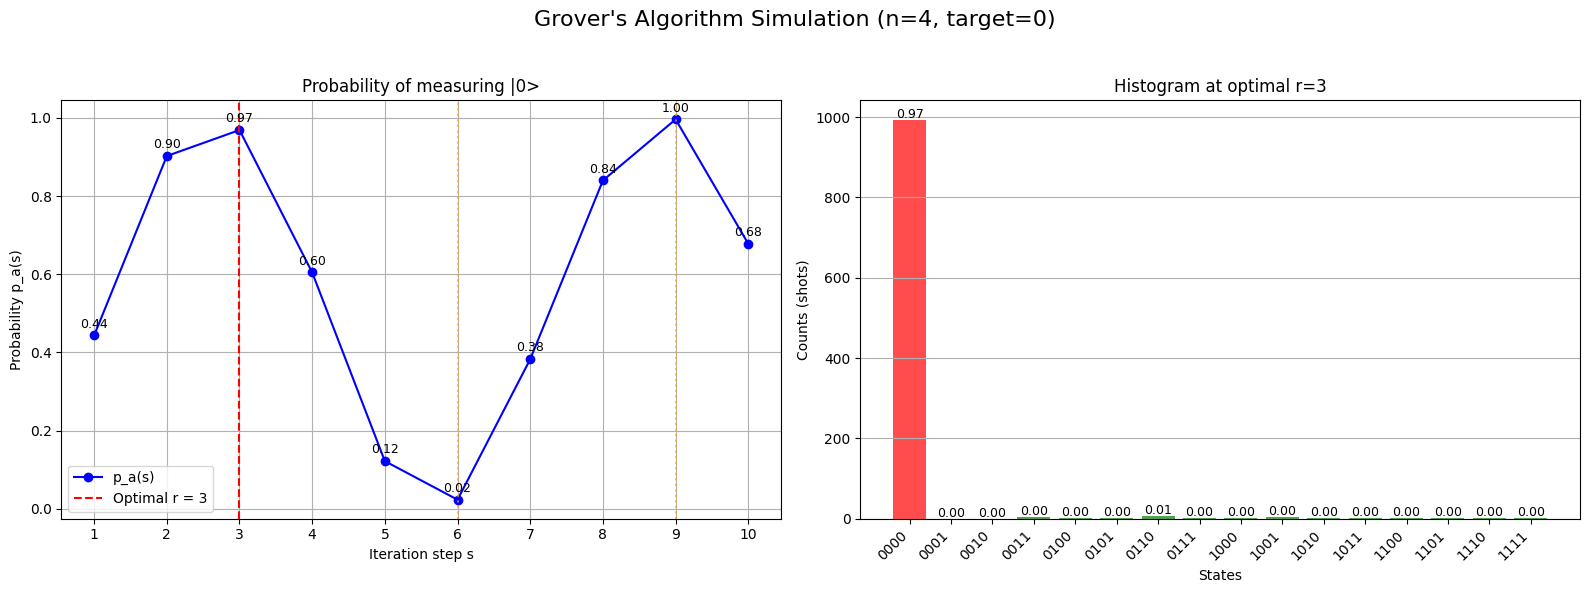

Number of qubits: 5, Target state: 0, Original target: 151936
Max iterations for testing: 10


C:\Users\tymon\AppData\Local\Temp\ipykernel_10492\65366846.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(all_states, rotation=45, ha='right')


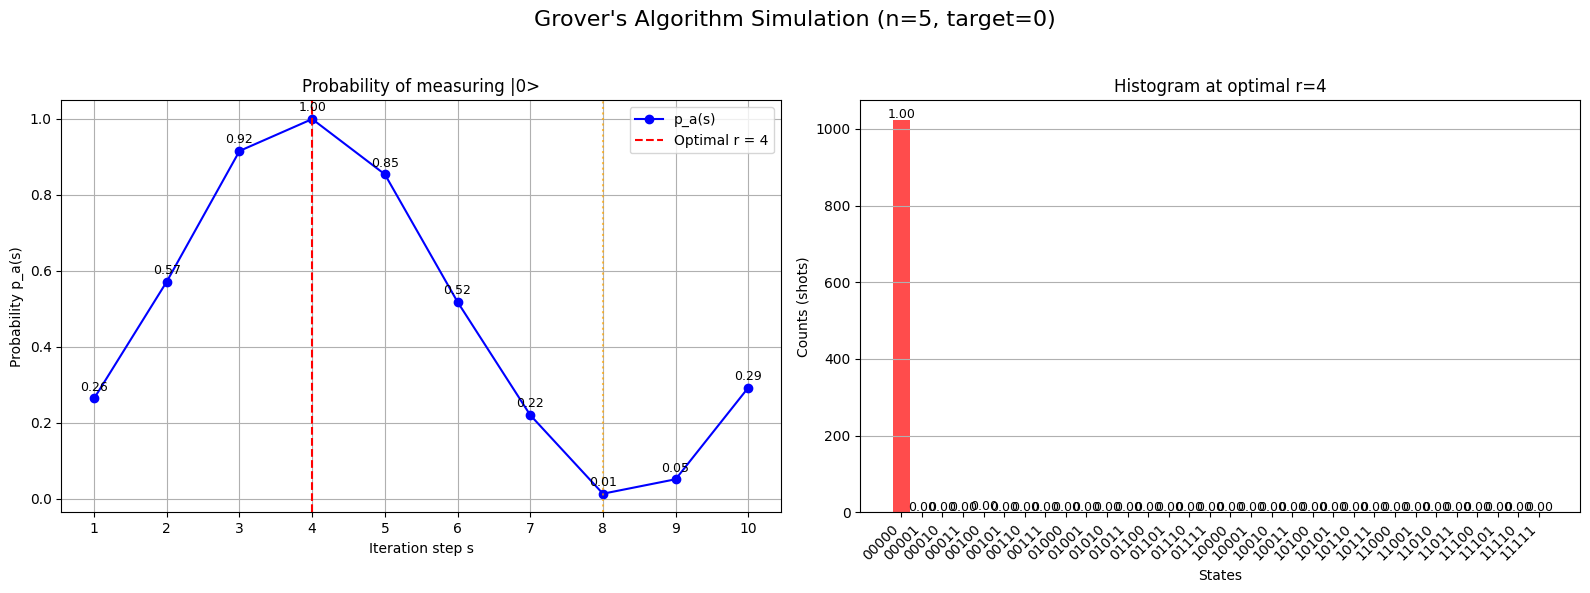

Number of qubits: 6, Target state: 0, Original target: 151936
Max iterations for testing: 10


C:\Users\tymon\AppData\Local\Temp\ipykernel_10492\65366846.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(all_states, rotation=45, ha='right')


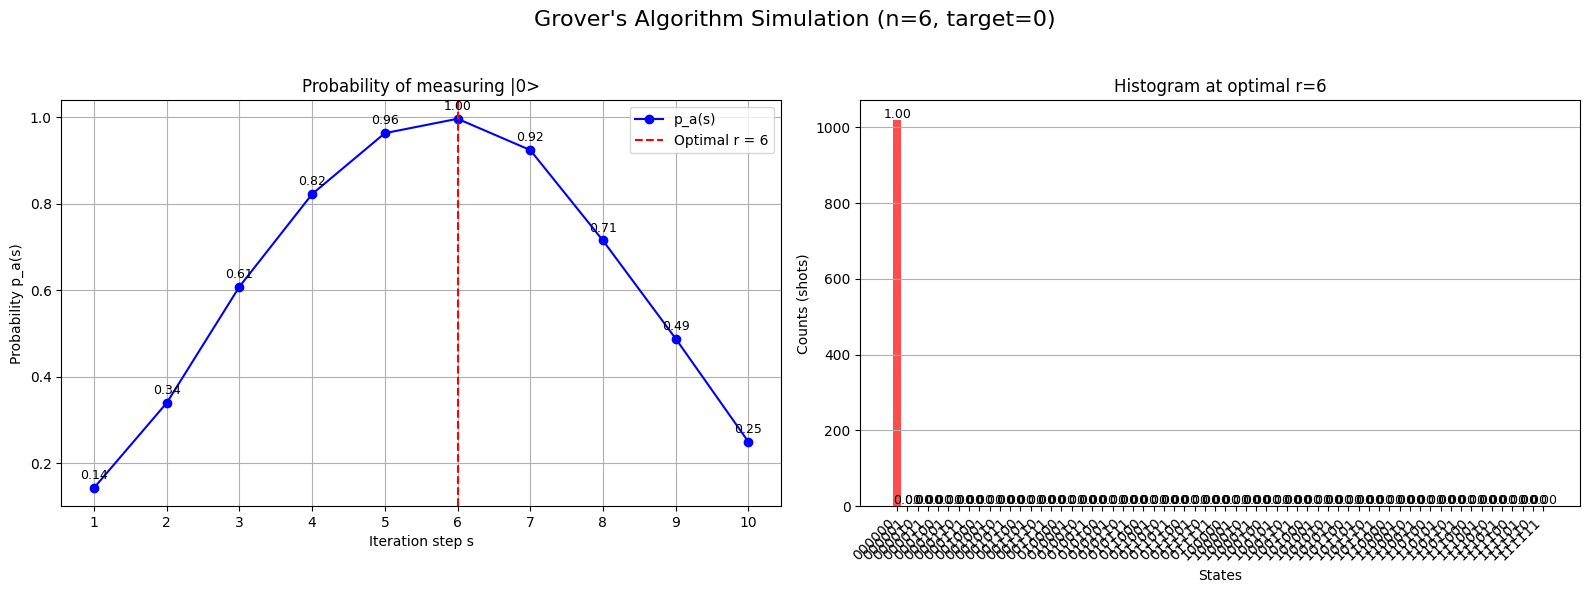

In [64]:
for q in QUBITS_TO_TEST:
    performTest(q, ID, max_iterations=10)